In [1]:
from codes.utils import load_alpha_digits
import matplotlib.pyplot as plt
import numpy as np
from codes.DNN import DNN

# Alpha Digits Test DBN

(39, 320)


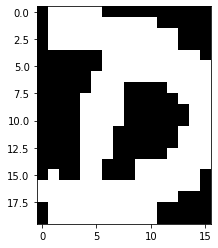

In [2]:
data = load_alpha_digits()
plt.imshow(data["dat"][13][0], cmap='gray')
d_letter = [data["dat"][13][i].flatten() for i in range(data["dat"][13].shape[0])]
d_letter = np.array(d_letter)   
print(d_letter.shape)

In [3]:
dnn = DNN(d_letter.shape[1], [30, 20])

dnn.pretrain(d_letter, 10, num_epochs=1000, lr=0.1)

Pretraining Complete: Reconstruction Error: 0.8558112


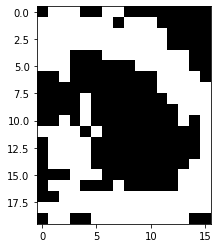

In [4]:
plt.imshow(dnn.generate_image_DBN(1,100, reshape=data["dat"][13][0].shape)[0], cmap='gray')
plt.show()

In [5]:
# first layer only

from codes.utils import reconstruction_error
l = dnn.layers[0]
p_h = l.input_output(d_letter[0])
h = (np.random.random_sample(l.output_size) < p_h) * 1

p_v = l.output_input(h)
x_tild = (np.random.random_sample(l.input_size) < p_v) * 1


reconstruction_error(d_letter[0], x_tild)


4.358898943540674

In [6]:
dnn.softmax(l, d_letter[0])

array([3.14210429e-073, 8.08011434e-049, 3.09047187e-050, 4.52760359e-044,
       2.59909241e-035, 1.60172214e-080, 4.16482374e-065, 5.25808611e-088,
       5.06194441e-110, 6.63902697e-092, 1.58208922e-078, 2.27577125e-077,
       6.00131736e-013, 1.28619353e-077, 3.84660253e-064, 3.30081153e-045,
       7.47281282e-079, 7.15744797e-084, 1.50752173e-031, 3.88676333e-090,
       3.58058474e-038, 1.80279318e-027, 7.22167895e-072, 1.20966943e-081,
       2.57269428e-020, 1.00000000e+000, 3.30359841e-099, 2.34473002e-063,
       2.94433962e-042, 5.77441043e-077])

# Test Classif without more training

In [1]:
from codes.utils import load_alpha_digits
import matplotlib.pyplot as plt
import numpy as np
from codes.DNN import DNN

data = load_alpha_digits()
digits = []
for digit_idx in range(10):
    digit = [data["dat"][digit_idx][i].flatten() for i in range(data["dat"][digit_idx].shape[0])]
    digit = np.array(digit)
    digits.append(digit)

digits = np.concatenate(digits)
digits.shape

(390, 320)

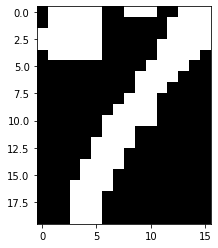

In [2]:
plt.imshow(digits[7*39 + 10].reshape(data["dat"][13][0].shape), cmap='gray')

In [4]:
dnn = DNN(digits.shape[1], [30, 20], 10)

dnn.pretrain(digits, 32, num_epochs=1000, lr=0.1)

Pretraining Complete: Reconstruction Error: 8.9832931


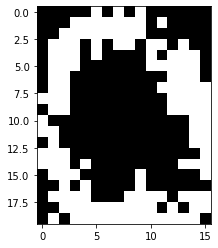

In [5]:
plt.imshow(dnn.generate_image_DBN(1,100, reshape=data["dat"][13][0].shape)[0], cmap='gray')
plt.show()

# Test MNIST

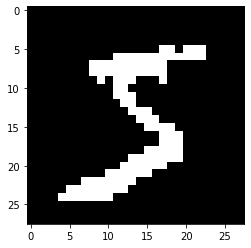

In [1]:
from codes.utils import load_mnist
from codes.DNN import DNN
import matplotlib.pyplot as plt
import numpy as np

train = load_mnist()
img = train[0][0]
label = train[1][0]

plt.imshow(img[0], cmap='gray')
plt.show()

In [2]:
img.shape

(60000, 28, 28)

In [3]:
label.shape

(60000,)

In [4]:
img = [img[i].flatten().reshape(1,-1) for i in range(img.shape[0])]
img = np.concatenate(img)

In [5]:
img.shape

(60000, 784)

In [6]:
dnn = DNN(784, [512, 128], 10)
indices = np.random.permutation(6000)
dnn.pretrain(img[indices], 128, num_epochs=5, lr=0.1)

Pretraining Complete: Reconstruction Error: 8.9736281


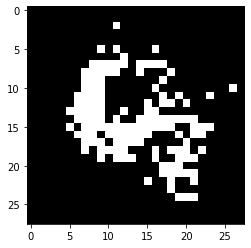

In [7]:
plt.imshow(dnn.generate_image_DBN(1,10, reshape=(28, 28))[0], cmap='gray')
plt.show()

In [1]:
from codes.utils import load_mnist
from codes.DNN import DNN
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

train = load_mnist()
img = train[0][0]
label = train[1][0]

img = [img[i].flatten().reshape(1,-1) for i in range(img.shape[0])]
img = np.concatenate(img)

dnn = DNN(784, [512, 128], 10)
# trop long si jprends tt le dataset
indices = np.random.permutation(60000)
dnn.pretrain(img[indices], 128, num_epochs=5, lr=0.1)

# one hot encoding the labels
one_hot_label = np.zeros((label.size, label.max()+1))
one_hot_label[np.arange(label.size),label] = 1

# backprop
loss_pretrain, score_pretrain = dnn.back_propagation(img[indices], one_hot_label[indices], batch_size=100, num_epochs=500, lr=0.1)

date and time = 10/03/2021 02:59:21
Pretraining Complete: Reconstruction Error: 6.9344626
epoch: 0 (Loss: train 2.15) (Accuracy: train 0.52)
epoch: 10 (Loss: train 0.69) (Accuracy: train 0.87)
epoch: 20 (Loss: train 0.44) (Accuracy: train 0.90)
epoch: 30 (Loss: train 0.34) (Accuracy: train 0.91)
epoch: 40 (Loss: train 0.29) (Accuracy: train 0.92)
epoch: 50 (Loss: train 0.26) (Accuracy: train 0.93)
epoch: 60 (Loss: train 0.23) (Accuracy: train 0.94)
epoch: 70 (Loss: train 0.21) (Accuracy: train 0.94)
epoch: 80 (Loss: train 0.20) (Accuracy: train 0.95)
epoch: 90 (Loss: train 0.18) (Accuracy: train 0.95)
epoch: 100 (Loss: train 0.17) (Accuracy: train 0.95)
epoch: 110 (Loss: train 0.16) (Accuracy: train 0.95)
epoch: 120 (Loss: train 0.15) (Accuracy: train 0.96)
epoch: 130 (Loss: train 0.15) (Accuracy: train 0.96)
epoch: 140 (Loss: train 0.14) (Accuracy: train 0.96)
epoch: 150 (Loss: train 0.13) (Accuracy: train 0.96)
epoch: 160 (Loss: train 0.13) (Accuracy: train 0.96)
epoch: 170 (Loss: tr

In [2]:
# datetime object containing current date and time
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

date and time = 10/03/2021 05:55:11


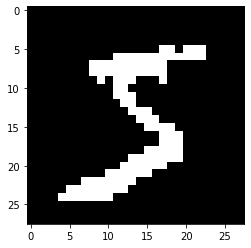

5

In [3]:
plt.imshow(img[0].reshape(28,28), cmap='gray')
plt.show()

np.argmax(dnn.input_output_network(img[0])[-1])

In [4]:
dnn = DNN(784, [512, 128], 10)
loss_no_pretrain, score_no_pretrain = dnn.back_propagation(img[indices], one_hot_label[indices], batch_size=100, num_epochs=500, lr=0.1)

epoch: 0 (Loss: train 2.30) (Accuracy: train 0.11)
epoch: 10 (Loss: train 2.13) (Accuracy: train 0.30)
epoch: 20 (Loss: train 0.98) (Accuracy: train 0.70)
epoch: 30 (Loss: train 0.65) (Accuracy: train 0.82)
epoch: 40 (Loss: train 0.51) (Accuracy: train 0.85)
epoch: 50 (Loss: train 0.43) (Accuracy: train 0.87)
epoch: 60 (Loss: train 0.38) (Accuracy: train 0.89)
epoch: 70 (Loss: train 0.34) (Accuracy: train 0.90)
epoch: 80 (Loss: train 0.31) (Accuracy: train 0.91)
epoch: 90 (Loss: train 0.29) (Accuracy: train 0.91)
epoch: 100 (Loss: train 0.27) (Accuracy: train 0.92)
epoch: 110 (Loss: train 0.25) (Accuracy: train 0.93)
epoch: 120 (Loss: train 0.23) (Accuracy: train 0.93)
epoch: 130 (Loss: train 0.22) (Accuracy: train 0.94)
epoch: 140 (Loss: train 0.21) (Accuracy: train 0.94)
epoch: 150 (Loss: train 0.20) (Accuracy: train 0.94)
epoch: 160 (Loss: train 0.19) (Accuracy: train 0.94)
epoch: 170 (Loss: train 0.18) (Accuracy: train 0.95)
epoch: 180 (Loss: train 0.17) (Accuracy: train 0.95)
epoc

In [5]:
# datetime object containing current date and time
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

date and time = 10/03/2021 08:49:09


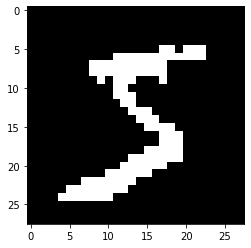

5

In [6]:
plt.imshow(img[0].reshape(28,28), cmap='gray')
plt.show()

np.argmax(dnn.input_output_network(img[0])[-1])